# Générer le graphe

## D'abord generer la matrice d'adjacence

In [1]:
import numpy as np
import random
random.seed(10)
def generer_matrice_adjacence(taille,typeDeGraphe):
    matrice = np.empty((taille, taille))              
    
    if(typeDeGraphe == 'Complete'):               
        for i in range(taille):
            for j in range(i,taille):
                valeur = 1 if i!=j else 0 
                matrice[i][j] = valeur
                matrice[j][i] = valeur
    else:
         for i in range(taille):
            for j in range(i,taille):
                valeur = random.randint(0,1)  if i!=j else 0
                matrice[i][j] = valeur
                matrice[j][i] = valeur
    return matrice

matriceAdjacence = generer_matrice_adjacence(8, "Not-Complete")
print(matriceAdjacence)

print("\n \n")     

matriceAdjacence = generer_matrice_adjacence(8, "Complete")
print(matriceAdjacence)

[[0. 0. 1. 1. 0. 0. 1. 1.]
 [0. 0. 1. 0. 0. 1. 1. 0.]
 [1. 1. 0. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 0. 1. 1. 0.]
 [0. 1. 0. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 0.]
 [1. 0. 0. 1. 0. 1. 0. 0.]]

 

[[0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0.]]


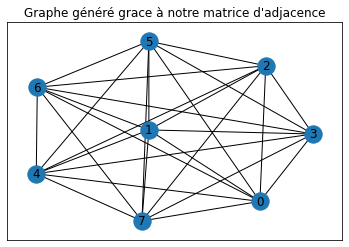

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
random.seed(10)
G = nx.Graph(matriceAdjacence, nodetype=int)
plt.title("Graphe généré grace à notre matrice d'adjacence")
nx.draw_networkx(G)

## Génerer la liste des voisins de chaque sommet en se basant sur la matrice d'adjacence

.

In [13]:
random.seed(10)
def lister_voisins(matriceAdjacence):
   
    taille = len(matriceAdjacence.T)
    voisins = []
    i=0
    while (i <= taille-1):
        for j in range(taille):
            if(matriceAdjacence[i][j] != 0 and matriceAdjacence[j][i] != 0):
                voisins.append(j)
        print("Les voisins du sommet", i, "sont :",voisins)
        voisins.clear()
        i+=1
        
lister_voisins(matriceAdjacence)

Les voisins du sommet 0 sont : [1, 2, 3, 4, 5, 6, 7]
Les voisins du sommet 1 sont : [0, 2, 3, 4, 5, 6, 7]
Les voisins du sommet 2 sont : [0, 1, 3, 4, 5, 6, 7]
Les voisins du sommet 3 sont : [0, 1, 2, 4, 5, 6, 7]
Les voisins du sommet 4 sont : [0, 1, 2, 3, 5, 6, 7]
Les voisins du sommet 5 sont : [0, 1, 2, 3, 4, 6, 7]
Les voisins du sommet 6 sont : [0, 1, 2, 3, 4, 5, 7]
Les voisins du sommet 7 sont : [0, 1, 2, 3, 4, 5, 6]


## Génerer la matrice symétrique pondérée

In [14]:
random.seed(10)
def generer_matrice_pondere(matrice):
    for i in range(len(matrice.T)):
        for j in range(i,len(matrice.T)):
            if(matrice[i][j] != 0):
                valeur = random.randint(0, 999)
                matrice[i][j] = valeur
                matrice[j][i] = valeur
    return matrice

matricePondere = generer_matrice_pondere(matriceAdjacence)
print(matricePondere)

[[  0. 585.  33. 439. 494. 591.  15. 211.]
 [585.   0. 473. 832. 503. 843. 284. 669.]
 [ 33. 473.   0. 830. 164.  35. 533. 501.]
 [439. 832. 830.   0. 335.  77. 255. 975.]
 [494. 503. 164. 335.   0. 975. 763. 369.]
 [591. 843.  35.  77. 975.   0.  45. 430.]
 [ 15. 284. 533. 255. 763.  45.   0. 880.]
 [211. 669. 501. 975. 369. 430. 880.   0.]]


## Génerer les fenetres de temps pour chaque sommet 

In [15]:
import random
random.seed(10)
def generate_time_window(matrice):
    timeWindow = {}
    for i in range(len(matrice)):
        timeOne = random.randint(0,4*len(matrice))
        timeTwo = random.randint(timeOne,4*len(matrice))
        timeWindow[i] = tuple([timeOne,timeTwo])
    timeWindow[0] = tuple([0,max(max(timeWindow.values()))+ random.randint(0,len(matrice))])
    timeWindow[len(matrice)] = timeWindow[0]
    return timeWindow
print(generate_time_window(matricePondere))


{0: (0, 37), 1: (30, 32), 2: (0, 13), 3: (29, 32), 4: (17, 22), 5: (2, 18), 6: (31, 32), 7: (4, 11), 8: (0, 37)}


# Recherche Tabou

<img src="./public/Source/Image/Tabou.png">


### Etape 0 : Génerer la solution initiale 
#### Cas 1 : géneration d'une solution intiale aléatoire

In [16]:
def genererSolutionInitiale(nbrSommet):
    return random.sample(range(0, nbrSommet), nbrSommet)
solutionInitial = genererSolutionInitiale(8)
print("La solution initiale = ", solutionInitial)

def generate_solution(matrice):
    sol = {}
    matriceSearch = [i for i in range(len(matrice))]
    matriceSearch.remove(0)
    i = 1
    while (len(matriceSearch) > 0):
        way = []
        way.append(0)
        for j in range(0,random.randint(1,len(matrice)-4)) :
            if len(matriceSearch) > 0 :
                value = random.choice(matriceSearch)
                way.append(value)
                matriceSearch.remove(value)
            else: 
                break
        way.append(0)
        sol[i] = way
        i += 1
    return sol

print(generate_solution(matricePondere))

La solution initiale =  [0, 3, 1, 4, 2, 5, 6, 7]


#### Cas 2 : géneration d'une solution intiale à l'aide de l'algorithme Clarke-Wright.

L'idée de base de l'algorithme Clarke-Wright est très simple. Considérons un dépôt D et n points de demande. Supposons qu'initialement la solution au VRP consiste à utiliser n véhicules et à envoyer un véhicule à chacun des n points de demande. La longueur totale du tour de cette solution est évidemment : s(i, j) = d(D, i) + d(D, j) - d(i, j)

Etape 1 : Calculer les économies s(i, j) = d(D, i) + d(D, j) - d(i, j) pour chaque paire (i, j) de points de demande.

<img src ="./public/Source/Image/Formule_Clarke.png">

<img src="./public/Source/Image/StructureOfSaving.png">

In [17]:
def generate_saving_matrice(matricePondere):

    matrixSize = len(matricePondere.T)
    savingMatrix = np.empty((matrixSize, matrixSize))  

    for i in range(matrixSize):
        for j in range(i,matrixSize):
            if i!=j:
                savingMatrix[i,j] = matricePondere[0,i] + matricePondere[0,j] - matricePondere[j,i] 
                savingMatrix[j,i] = savingMatrix[i,j]
    return savingMatrix

savingMatrix = generate_saving_matrice(matricePondere)
print(savingMatrix)

[[   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.  145.  192.  576.  333.  316.  127.]
 [   0.  145.    0. -358.  363.  589. -485. -257.]
 [   0.  192. -358.    0.  598.  953.  199. -325.]
 [   0.  576.  363.  598.    0.  110. -254.  336.]
 [   0.  333.  589.  953.  110.    0.  561.  372.]
 [   0.  316. -485.  199. -254.  561.    0. -654.]
 [   0.  127. -257. -325.  336.  372. -654.    0.]]


Etape 2 : Classer les économies s(i, j) par ordre de grandeur décroissant. Cela crée la "liste d'économies". 

<img src="./public/Source/Image/SavingList.png">

In [18]:
import pprint

def generate_saving_list(matricePondere):
    listSaving =  {}
    matrixSize = len(matricePondere.T)
    
    for i in range(matrixSize):
        for j in range(i,matrixSize):
            if i!=j and i!=0:
                listSaving[(i,j)] = matricePondere[0,i] + matricePondere[0,j] - matricePondere[j,i] 

    sorted_saving_list = dict( sorted(listSaving.items(),key=lambda item: item[1],reverse=True))
    return sorted_saving_list

listSaving = generate_saving_list(matricePondere)


pp = pprint.PrettyPrinter(depth=3,sort_dicts=False)
pp.pprint(listSaving)

{(3, 5): 953.0,
 (3, 4): 598.0,
 (2, 5): 589.0,
 (1, 4): 576.0,
 (5, 6): 561.0,
 (5, 7): 372.0,
 (2, 4): 363.0,
 (4, 7): 336.0,
 (1, 5): 333.0,
 (1, 6): 316.0,
 (3, 6): 199.0,
 (1, 3): 192.0,
 (1, 2): 145.0,
 (1, 7): 127.0,
 (4, 5): 110.0,
 (4, 6): -254.0,
 (2, 7): -257.0,
 (3, 7): -325.0,
 (2, 3): -358.0,
 (2, 6): -485.0,
 (6, 7): -654.0}


# Etape 1 : Génrer la liste de voisins de la solution initiale

In [9]:
def genererVoisinage(solution):
    listeVoisins = []
    voisinage = solution
    for i in range(len(solution)):
        for j in range(i+1,len(solution)-1):
            voisinage = solution.copy()
            voisinage[i], voisinage[j] = voisinage[j],  voisinage[i]
            listeVoisins.append(voisinage)
    return listeVoisins
       
listeVoisins  = genererVoisinage(solutionInitial)
print(listeVoisins)

[[3, 0, 1, 4, 2, 5, 6, 7], [1, 3, 0, 4, 2, 5, 6, 7], [4, 3, 1, 0, 2, 5, 6, 7], [2, 3, 1, 4, 0, 5, 6, 7], [5, 3, 1, 4, 2, 0, 6, 7], [6, 3, 1, 4, 2, 5, 0, 7], [0, 1, 3, 4, 2, 5, 6, 7], [0, 4, 1, 3, 2, 5, 6, 7], [0, 2, 1, 4, 3, 5, 6, 7], [0, 5, 1, 4, 2, 3, 6, 7], [0, 6, 1, 4, 2, 5, 3, 7], [0, 3, 4, 1, 2, 5, 6, 7], [0, 3, 2, 4, 1, 5, 6, 7], [0, 3, 5, 4, 2, 1, 6, 7], [0, 3, 6, 4, 2, 5, 1, 7], [0, 3, 1, 2, 4, 5, 6, 7], [0, 3, 1, 5, 2, 4, 6, 7], [0, 3, 1, 6, 2, 5, 4, 7], [0, 3, 1, 4, 5, 2, 6, 7], [0, 3, 1, 4, 6, 5, 2, 7], [0, 3, 1, 4, 2, 6, 5, 7]]


## Etape 2 : Trouver la meilleur solution de la liste de vosisinage 

In [10]:
def meilleurVoisin(listeVoisins, matricePondere):
    meilleurVoisin = []
    meilleurCout = 0
    for voisin in range(len(listeVoisins)):
        cout = 0
        for elm in range(len(listeVoisins[voisin])-1):
            i = listeVoisins[voisin][elm]
            j = listeVoisins[voisin][elm+1]
            cout = cout + matricePondere[i-1][j-1]
            if(len(meilleurVoisin) == 0):
                meilleurVoisin = listeVoisins[voisin]
                meilleurCout = cout
        if(cout < meilleurCout):
            meilleurVoisin = listeVoisins[voisin]
            meilleurCout = cout

    return meilleurVoisin, meilleurCout   # Cette fonction retourne le meilleur voisin ainsi que son cout 
        
bestVoisin = meilleurVoisin(listeVoisins, matricePondere)

print(bestVoisin) 


([3, 0, 1, 4, 2, 5, 6, 7], 501.0)


## Etape 03 : Est-ce que la meilleurSolutionVoisine est meilleur que la meilleurSolution ?

In [11]:
def estMeilleurQue(solution_1,solution_2):

    if(len(solution_1) != len(solution_2)):
        print("Les deux solutions doivent etre de meme taille.")
        return 0

    cout_1 = 0
    cout_2 = 0
   
    for i in range(len(solution_1)-1):
        cout_1 += matricePondere[solution_1[i]][solution_1[i+1]]
        cout_2 += matricePondere[solution_2[i]][solution_2[i+1]]

    return cout_1 > cout_2

# estMeilleurQue([3, 5, 7, 4, 8, 6, 2, 1],[5, 7, 8, 6, 2, 1])         # Cas 1: pas la meme taille
# estMeilleurQue([1, 4, 3, 2, 7, 0, 5, 6],[3, 4, 1, 2, 7, 0, 5, 6])   # Cas 2: cout de la sol1 est meilleur
estMeilleurQue([3, 4, 1, 2, 7, 0, 5, 6],[1, 4, 3, 2, 7, 0, 5, 6])     # Cas 3: cout de la sol1 n'est pas  meilleur que Sol2

False

## Implemantation de la Recherche Tabou

In [12]:
##################### Premiere version (Work In Progress )  ##############################

def RechercheTabou(nbrSommet,matricePondere,iterationMax):
    solutionCourante = genererSolutionInitiale(nbrSommet)
    listeVoisins = list()
    meilleurSolution = list()
    listeTabou = list()
    iteration = 1
    meilleurCout = 0

    while(iteration < iterationMax):
        listeVoisins = genererVoisinage(solutionCourante)
        meilleurSolutionVoisine, meilleurCout = meilleurVoisin(listeVoisins,matricePondere)

        if(estMeilleurQue(meilleurSolutionVoisine,solutionCourante)):
            solutionCourante = meilleurSolutionVoisine
            meilleurSolution = meilleurSolutionVoisine
            listeTabou.clear()
            listeTabou.append(meilleurSolution)
        elif(meilleurSolutionVoisine in listeTabou):
            listeVoisins.remove(meilleurSolutionVoisine)

        else :
            solutionCourante = meilleurSolutionVoisine
            meilleurSolution = meilleurSolutionVoisine
            listeTabou.clear()
            listeTabou.append(meilleurSolution)
        iteration+= 1

    return meilleurSolutionVoisine , meilleurCout
    
meilleurChemin, meilleurCout = RechercheTabou(8,matricePondere,100)

print(meilleurChemin,meilleurCout)

##################### Premiere version (Work In Progress )  ##############################

[3, 4, 1, 2, 7, 0, 5, 6] 830.0
